# Área de pruebas y juegos

En este documento es posible hacer pruebas rápidas de código en Python. Aquí están los fragmentos de código incluidos en el enunciado del proyecto.

> Nota: es necesario seleccionar el "kernel" de Python que va a ejecutar este código localmente. Típicamente será el kernel provisto por la instalación de Anaconda.

## Ejemplo de uso de `requests`

In [2]:
import requests

# Usuario(a) de GitHub
usuario = "fabianabarca"

# Construir la URL
api_url = "https://api.github.com/users/" + usuario

# Hacer la solicitud GET y guardar un "Response" en la variable r
r = requests.get(api_url)

# Convertir la información obtenida en JSON
datos = r.json()

# Extraer y mostrar algún dato particular con la llave "company"
print("Compañía:", datos["company"])

Compañía: Universidad de Costa Rica


## Ejemplo de gráficas

Tres paquetes de graficación:

- Matplotlib
- Seaborn
- Plotly

### Matplotlib

#### Función matemática con Matplotlib

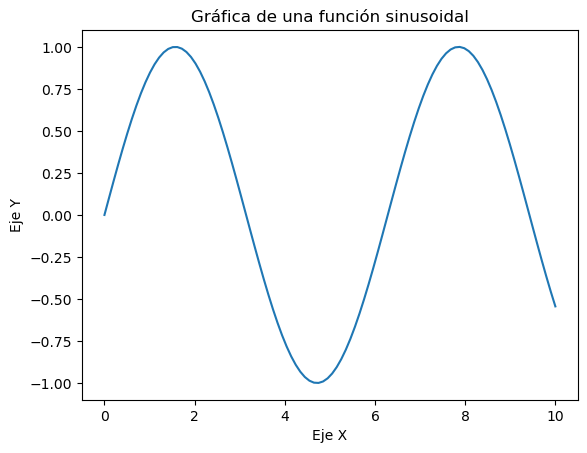

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(x, y)
ax.set_title("Gráfica de una función sinusoidal")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

# Mostrar la gráfica
plt.show()

#### Histograma con Matplotlib

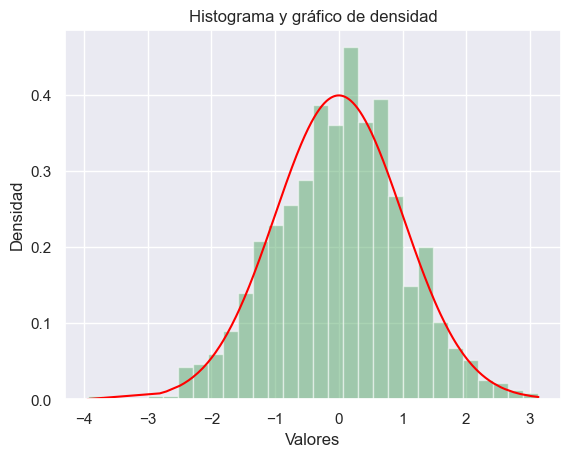

In [15]:
import matplotlib.pyplot as plt
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=0, scale=1)
data = X.rvs(size=1000)

# Crear un histograma
plt.hist(data, bins=30, density=True, alpha=0.5, color='g')

# Crear un gráfico de densidad
plt.plot(sorted(data), stats.norm.pdf(sorted(data), loc=0, scale=1), color='red')
plt.title("Histograma y gráfico de densidad")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.show()

### Seaborn

#### Función matemática con Seaborn

/Users/fabian/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gráfico de dispersión con Seaborn')

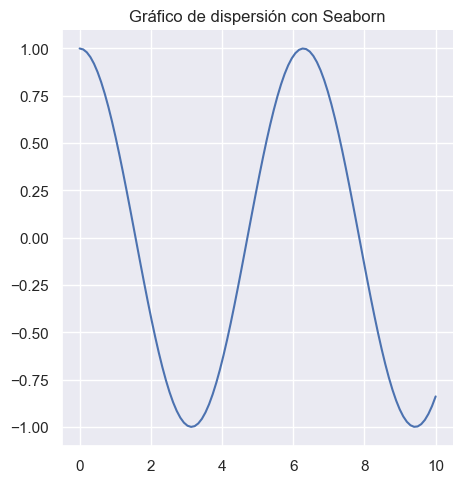

In [11]:
import seaborn as sns
import numpy as np

# Generar datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.cos(x)

sns.set_theme()

# Crear un gráfico de dispersión
sns.relplot(kind="line", x=x, y=y)

# Colocar título y etiquetas
plt.title("Gráfico de dispersión con Seaborn")

#### Histograma con Seaborn

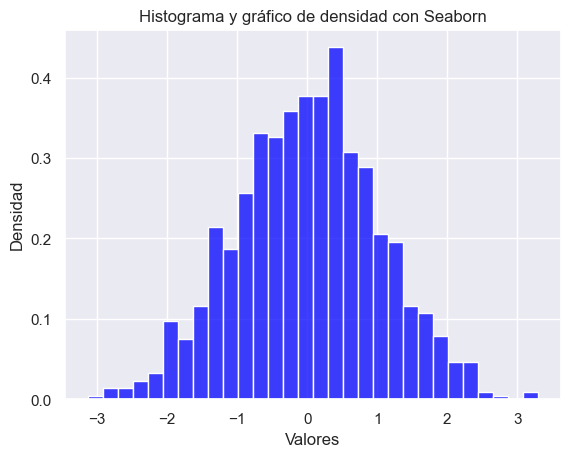

In [17]:
import seaborn as sns
import pandas as pd
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=0, scale=1)
data = X.rvs(size=1000)

# Crear un DataFrame
df = pd.DataFrame(data, columns=["Valores"])

# Crear un histograma
sns.histplot(df["Valores"], bins=30, color='blue', stat="density")
plt.title("Histograma y gráfico de densidad con Seaborn")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.show()


#### Plotly

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generar datos de ejemplo como un DataFrame
df = pd.DataFrame({
    "x": np.linspace(0, 10, 100),
    "y": np.sin(np.linspace(0, 10, 100))
})

# Crear un gráfico de dispersión interactivo
fig = px.line(df, x="x", y="y", title="Gráfico de dispersión interactivo con Plotly")
fig.show()

#### Histograma con Plotly

In [ ]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
from scipy import stats

# Datos aleatorios de ejemplo a partir de una distribución normal
X = stats.norm(loc=0, scale=1)
data = X.rvs(size=1000)

# Crear un DataFrame
df = pd.DataFrame(data, columns=["Valores"])

# Crear un histograma
fig = px.histogram(
    df, x="Valores", title="Histograma interactivo con Plotly", histnorm="probability"
)
fig.update_xaxes(title_text="Valores")
fig.update_yaxes(title_text="Cantidad de valores")
fig.show()

# Download figure as SVG
pio.write_image(fig, "histograma.svg")

**Universidad de Costa Rica** | Escuela de Ingeniería Eléctrica

IE0405 - Modelos Probabilísticos de Señales y Sistemas